# Support Vector Classifier 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

#### Lets create synthetic data points

In [2]:

from sklearn.datasets import make_classification

In [3]:
X,y=make_classification(n_samples=5000,n_features=2,n_classes=2,
                        n_clusters_per_class=2,n_redundant=0)

In [4]:
X,y

(array([[ 0.70504595, -3.5781408 ],
        [ 2.68907701,  0.81140773],
        [-2.41296202,  0.33693979],
        ...,
        [ 1.2576705 , -1.25704945],
        [-0.94570882,  1.61992427],
        [ 0.04535773,  1.60905949]]),
 array([0, 1, 0, ..., 1, 0, 1]))

In [5]:
pd.DataFrame(X)[0]

0       0.705046
1       2.689077
2      -2.412962
3       1.364337
4       0.680291
          ...   
4995    1.004871
4996   -2.000079
4997    1.257670
4998   -0.945709
4999    0.045358
Name: 0, Length: 5000, dtype: float64

### Visualizing two features of X (X[0] and X[1]) with hue y

<Axes: xlabel='0', ylabel='1'>

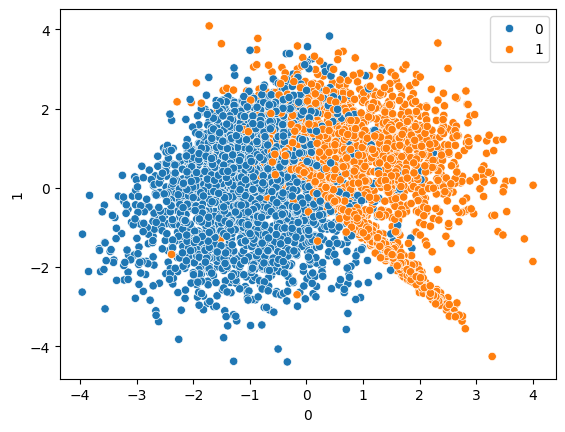

In [6]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

### Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [8]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [9]:
svc.coef_

array([[1.92102883, 0.35548684]])

### Prediction

In [10]:

y_pred=svc.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [12]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       623
           1       0.85      0.90      0.87       627

    accuracy                           0.87      1250
   macro avg       0.87      0.87      0.87      1250
weighted avg       0.87      0.87      0.87      1250

[[522 101]
 [ 65 562]]
0.8672


## Hyperparameter Tuning With SVC

In [13]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','poly', 'rbf', 'sigmoid']
              }

In [14]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [15]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.899 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.881 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.872 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.884 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.875 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.861 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.860 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.852 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.880 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.853 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.909 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

#### Best parameters found:


In [16]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

## Prediction 

In [17]:

y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       623
           1       0.86      0.89      0.88       627

    accuracy                           0.87      1250
   macro avg       0.87      0.87      0.87      1250
weighted avg       0.87      0.87      0.87      1250

[[535  88]
 [ 69 558]]
0.8672
